In [1]:
import numpy as np
from prim import PRIM
import seaborn as sns
import sys
import pandas as pd

In [2]:
def generate_data(parameter_from_dataset, varied_parameter):
    
    if varied_parameter == 'size':
        num_features = 5
        data_size = parameter_from_dataset
    else:
        if varied_parameter == 'dimension':
            num_features = parameter_from_dataset
            data_size = 100
        else:
            return None
        
    # Define the covariance matrix, mean vectors, and dimensionality
    cov = np.eye(num_features)  # Identity matrix for covariance (change as needed)
    m1 = np.zeros(num_features)  # Mean vector for class 0 (change as needed)
    m2 = np.ones(num_features)  # Mean vector for class 1 (change as needed)
    
    # Generate synthetic data for the specified dimensionality
    x = np.vstack((np.random.multivariate_normal(m1, cov, data_size),
                   np.random.multivariate_normal(m2, cov, data_size)))
    
    y = np.hstack((np.zeros(data_size), np.ones(data_size))).astype(int)
    
    # Generating a large synthetic dataset for testing
    xtest = np.vstack((np.random.multivariate_normal(m1, cov, 100 * data_size),
                       np.random.multivariate_normal(m2, cov, 100 * data_size)))
    
    ytest = np.hstack((np.zeros(100 * data_size), np.ones(100 * data_size))).astype(int)
    
    return x, y, xtest, ytest


In [3]:
def calculate_score(x, y, xtest, ytest, model, measurement_score):
    model.fit(x, y)
    score = getattr(model, 'calculate_' + measurement_score)
    return score(x, y), score(xtest, ytest)
    

In [4]:
def calculate_all_scores(number_of_datasets, dataset_parameters, model, varied_parameter, measurement_score):
    k = 0
    result=[]

    for i in range(number_of_datasets):
        for j in dataset_parameters:
            k = k + 1
            sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(number_of_datasets*len(dataset_parameters)))
            x, y, xtest, ytest = generate_data(j, varied_parameter)
            test, train = calculate_score(x, y, xtest, ytest, model, measurement_score)
            result.append(pd.DataFrame([[j, test, train]]))
            
    return result


In [5]:
def format_results(results, varied_parameter, measurement_score):
    results= pd.concat(results)
    results.columns = ('size', 'PRIM_test', 'PRIM_train')
    tmpres1 = results[['size', 'PRIM_test']]
    tmpres1['method'] = pd.Series(['PRIM_test']).repeat(tmpres1.shape[0])
    tmpres1.columns = ('Data ' + varied_parameter, measurement_score, 'method')
    tmpres2 = results[['size', 'PRIM_train']]
    tmpres2['method'] = pd.Series(['PRIM_train']).repeat(tmpres2.shape[0])
    tmpres2.columns = ('Data ' + varied_parameter, measurement_score, 'method')
    return tmpres1.append(tmpres2)

In [6]:
def show_results(number_of_datasets, dataset_parameters, model, varied_parameter, measurement_score):
    results = calculate_all_scores(number_of_datasets, dataset_parameters, model, varied_parameter, measurement_score)
    results = format_results(results, varied_parameter, measurement_score)
    return sns.pointplot(x = 'Data ' + varied_parameter, y = measurement_score, hue = 'method', data = results)
      

experiment 5400/5400

/var/folders/q6/xp9ntqs504g_7q5mrx26_wdc0000gn/T/ipykernel_11357/1487567625.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return tmpres1.append(tmpres2)


<Axes: xlabel='Data size', ylabel='accuracy'>

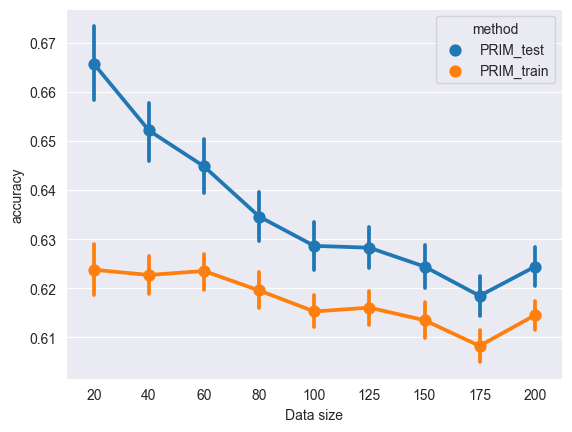

In [8]:
show_results(600, [20, 40, 60, 80, 100, 125, 150, 175, 200], PRIM(alpha=0.05), 'size')

experiment 4200/4200

/var/folders/q6/xp9ntqs504g_7q5mrx26_wdc0000gn/T/ipykernel_11357/1487567625.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return tmpres1.append(tmpres2)


<Axes: xlabel='Data dimension', ylabel='accuracy'>

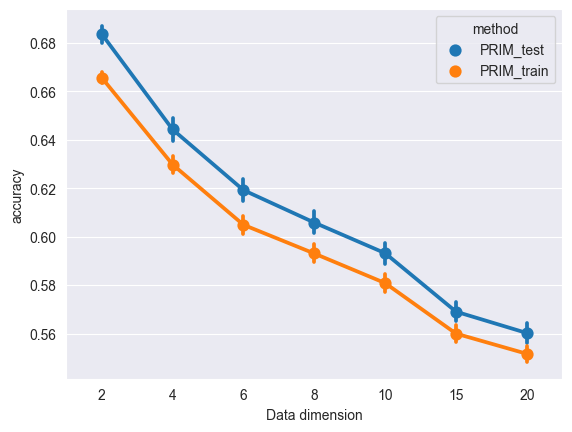

In [9]:
show_results(600, [2, 4, 6, 8, 10, 15, 20], PRIM(alpha=0.05), 'dimension')

experiment 5400/5400

/var/folders/q6/xp9ntqs504g_7q5mrx26_wdc0000gn/T/ipykernel_11357/1487567625.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return tmpres1.append(tmpres2)


<Axes: xlabel='Data size', ylabel='precision'>

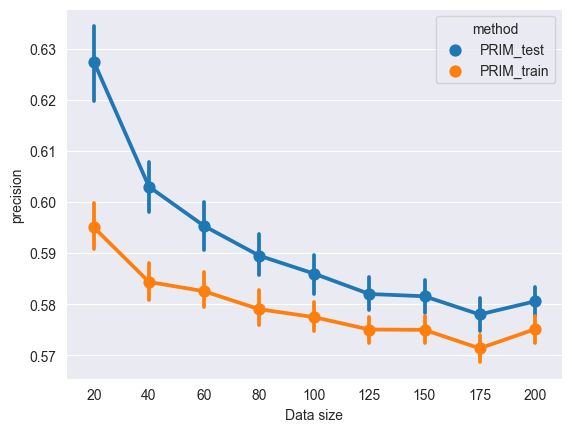

In [10]:
show_results(60, [20, 40, 60, 80, 100, 125, 150, 175, 200], PRIM(alpha=0.05), 'size', 'precision')

experiment 4200/4200

/var/folders/q6/xp9ntqs504g_7q5mrx26_wdc0000gn/T/ipykernel_11357/1487567625.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return tmpres1.append(tmpres2)


<Axes: xlabel='Data dimension', ylabel='precision'>

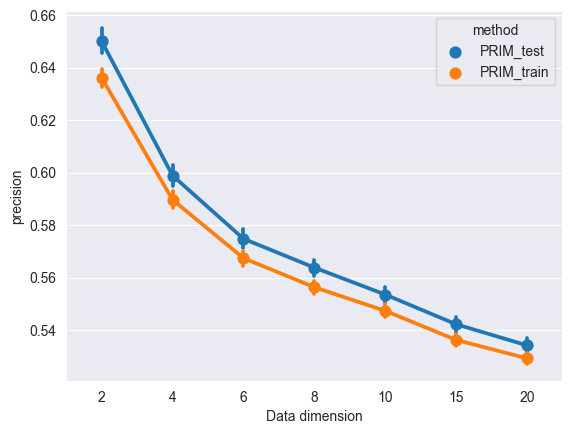